# Tuition pay

- diversity and better chance of living
- where did tuition grow
- what makes your chances of better pay higher (for several unis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [310]:
from matplotlib.font_manager import FontProperties

sns.set(font='Comic Sans MS')

font = FontProperties()
font.set_family('Comic Sans MS')
font.set_name('Comic Sans')

In [311]:
sal_pot = pd.read_csv('salary_potential.csv')
div_sch = pd.read_csv('diversity_school.csv')
stu_div = pd.read_csv('student_diversity.csv')
tui_cost = pd.read_csv('tuition_cost.csv')
tui_inc = pd.read_csv('tuition_income.csv')
all_sch = pd.read_csv('all-schools.csv', encoding='unicode_escape')

Columns (0,302,312) have mixed types.Specify dtype option on import or set low_memory=False.


In [341]:
sal_pot.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [342]:
#stu_div[stu_div.columns[1:]] = stu_div[stu_div.columns[1:]].applymap(lambda x: int(''.join(x.split(','))))
stu_div.head()

,INSTITUTION,ENROLLMENT,WOMEN,AMERICAN INDIAN / ALASKA NATIVE,ASIAN,BLACK,HISPANIC,NATIVE HAWAIIAN / PACIFIC ISLANDER,WHITE,TWO OR MORE RACES,UNKNOWN,NON-\nRESIDENT FOREIGN,TOTAL MINORITY
0,U. of Phoenix-ArizonaArizona,"195,059","134,722",876,"1,959","31,455","13,984","1,019","58,209","19,039","65,163","3,355","68,332"
1,Ivy Tech Community College-Central IndianaIndiana,"91,179","53,476",357,"1,369","12,370","5,533",0,"61,498","1,804","8,224",24,"21,433"
2,Liberty U.Virginia,"81,459","48,329",447,856,"14,751","1,186",151,"39,062","1,772","22,198","1,036","19,163"
3,Lone Star College systemTexas,"69,395","41,268",168,"4,198","12,094","23,751",0,"23,615","1,997","2,273","1,299","42,208"
4,Miami Dade CollegeFlorida,"66,046","38,323",47,655,"10,722","44,870",41,"4,170",226,"1,927","3,388","56,561"


In [343]:
div_sch.head()

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984


# what makes better pay for top universities

In [344]:
tui_inc.head()

,name,state,total_price,year,campus,net_cost,income_lvl
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000"
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000"
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000"
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000"
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000"


In [316]:
sal_pot.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [345]:
pay_prosp = sal_pot.merge(tui_inc, left_on='name', right_on='name', how='inner')
pay_prosp['income_lvl'] = pay_prosp['income_lvl'].map({'0 to 30,000':0,
'30,001 to 48,000':1,
'48,001 to 75,000':2,
'75,001 to 110,000':3,
'Over 110,000':4})
#pay_prosp['income_lvl'].value_counts().sum()
pay_prosp = pay_prosp.dropna(how='any')
pay_prosp.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl
0,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,11380.0,0.0
1,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,13545.0,1.0
3,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,17923.0,3.0
4,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,19536.0,4.0
5,1,Auburn University,Alabama,54400,104500,51.0,31,AL,23788,2012,On Campus,13191.0,0.0


In [346]:
# все названия универов

pay_prosp['name'].unique()

array(['Auburn University', 'University of Alabama in Huntsville',
       'The University of Alabama', 'Tuskegee University',
       'Samford University', 'Spring Hill College',
       'Birmingham Southern College',
       'University of Alabama at Birmingham',
       'University of South Alabama', 'Troy University',
       'Jacksonville State University', 'Auburn University at Montgomery',
       'Huntingdon College', 'Oakwood University',
       'University of West Alabama', 'University of North Alabama',
       'University of Mobile', 'Alabama State University',
       'Faulkner University', 'University of Montevallo',
       'Judson College', 'Miles College',
       'University of Alaska Fairbanks', 'University of Alaska Anchorage',
       'Alaska Pacific University',
       'Embry-Riddle Aeronautical University-Prescott',
       'University of Arizona', 'Arizona State University-Tempe',
       'Northern Arizona University', 'Prescott College',
       'University of Arkansas', 'Hen

In [320]:
pay_prosp.columns

Index(['rank', 'name', 'state_name', 'early_career_pay', 'mid_career_pay',
       'make_world_better_percent', 'stem_percent', 'state', 'total_price',
       'year', 'campus', 'net_cost', 'income_lvl'],
      dtype='object')

## catboost and shap values

In [321]:
# target is mid career pay

X = pay_prosp[['name', 'rank',
       'make_world_better_percent', 'stem_percent', 'state', 'total_price',
       'year', 'campus', 'net_cost', 'income_lvl']]
y = pay_prosp['mid_career_pay']

In [322]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import shap
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X[X.columns[1:]], y, test_size=0.3)

cb = CatBoostRegressor(iterations=1000, learning_rate=1, random_seed=123)
cb.fit(X_train, y_train, ['state', 'campus'])
preds_test = cb.predict(X_test)
mean_squared_error(y_test, preds_test)

0:	learn: 7844.5585791	total: 67.9ms	remaining: 1m 7s
1:	learn: 6341.7413555	total: 98.4ms	remaining: 49.1s
2:	learn: 5061.7385347	total: 117ms	remaining: 38.9s
3:	learn: 4522.9774542	total: 139ms	remaining: 34.6s
4:	learn: 4256.0214903	total: 155ms	remaining: 30.8s
5:	learn: 3976.2121509	total: 176ms	remaining: 29.1s
6:	learn: 3757.8524156	total: 199ms	remaining: 28.3s
7:	learn: 3628.0272490	total: 211ms	remaining: 26.2s
8:	learn: 3501.8861806	total: 227ms	remaining: 25s
9:	learn: 3400.3114600	total: 236ms	remaining: 23.4s
10:	learn: 3316.6721440	total: 246ms	remaining: 22.2s
11:	learn: 3158.6626046	total: 254ms	remaining: 20.9s
12:	learn: 3041.4549941	total: 270ms	remaining: 20.5s
13:	learn: 2910.9316545	total: 284ms	remaining: 20s
14:	learn: 2849.7249623	total: 295ms	remaining: 19.4s
15:	learn: 2780.1412816	total: 322ms	remaining: 19.8s
16:	learn: 2726.7567212	total: 337ms	remaining: 19.5s
17:	learn: 2644.9747303	total: 354ms	remaining: 19.3s
18:	learn: 2611.0374408	total: 376ms	rem

162:	learn: 891.6811087	total: 3.2s	remaining: 16.4s
163:	learn: 889.2340025	total: 3.22s	remaining: 16.4s
164:	learn: 885.9934272	total: 3.24s	remaining: 16.4s
165:	learn: 881.9125734	total: 3.26s	remaining: 16.4s
166:	learn: 879.7180956	total: 3.27s	remaining: 16.3s
167:	learn: 878.5933205	total: 3.29s	remaining: 16.3s
168:	learn: 877.3833612	total: 3.3s	remaining: 16.2s
169:	learn: 876.3809220	total: 3.32s	remaining: 16.2s
170:	learn: 870.6031756	total: 3.33s	remaining: 16.2s
171:	learn: 869.5282857	total: 3.35s	remaining: 16.1s
172:	learn: 868.9272846	total: 3.36s	remaining: 16.1s
173:	learn: 868.7792022	total: 3.37s	remaining: 16s
174:	learn: 867.1376080	total: 3.38s	remaining: 16s
175:	learn: 866.0452402	total: 3.41s	remaining: 15.9s
176:	learn: 864.8736467	total: 3.43s	remaining: 15.9s
177:	learn: 863.1738244	total: 3.45s	remaining: 15.9s
178:	learn: 861.4044860	total: 3.46s	remaining: 15.9s
179:	learn: 859.6078237	total: 3.47s	remaining: 15.8s
180:	learn: 857.9066326	total: 3.4

318:	learn: 675.1136865	total: 5.23s	remaining: 11.2s
319:	learn: 674.5753919	total: 5.24s	remaining: 11.1s
320:	learn: 673.6009681	total: 5.25s	remaining: 11.1s
321:	learn: 673.0563147	total: 5.26s	remaining: 11.1s
322:	learn: 672.8062973	total: 5.27s	remaining: 11.1s
323:	learn: 672.0466112	total: 5.29s	remaining: 11s
324:	learn: 671.2696559	total: 5.3s	remaining: 11s
325:	learn: 670.3029864	total: 5.32s	remaining: 11s
326:	learn: 669.3867548	total: 5.33s	remaining: 11s
327:	learn: 669.0415868	total: 5.35s	remaining: 11s
328:	learn: 668.1103331	total: 5.36s	remaining: 10.9s
329:	learn: 667.7036802	total: 5.38s	remaining: 10.9s
330:	learn: 666.9321670	total: 5.39s	remaining: 10.9s
331:	learn: 666.4635753	total: 5.4s	remaining: 10.9s
332:	learn: 665.4564101	total: 5.41s	remaining: 10.8s
333:	learn: 664.4092843	total: 5.42s	remaining: 10.8s
334:	learn: 664.1203328	total: 5.43s	remaining: 10.8s
335:	learn: 661.7725557	total: 5.44s	remaining: 10.7s
336:	learn: 661.1649172	total: 5.45s	rem

474:	learn: 571.8862606	total: 7.04s	remaining: 7.78s
475:	learn: 571.1229064	total: 7.05s	remaining: 7.76s
476:	learn: 570.1055742	total: 7.06s	remaining: 7.74s
477:	learn: 569.4790177	total: 7.07s	remaining: 7.72s
478:	learn: 569.0904285	total: 7.09s	remaining: 7.71s
479:	learn: 568.7427349	total: 7.1s	remaining: 7.69s
480:	learn: 568.5332035	total: 7.11s	remaining: 7.67s
481:	learn: 568.2245351	total: 7.12s	remaining: 7.66s
482:	learn: 566.9893748	total: 7.13s	remaining: 7.63s
483:	learn: 565.6718288	total: 7.14s	remaining: 7.62s
484:	learn: 565.2885978	total: 7.15s	remaining: 7.6s
485:	learn: 565.1304474	total: 7.17s	remaining: 7.58s
486:	learn: 564.8959101	total: 7.18s	remaining: 7.56s
487:	learn: 564.4333722	total: 7.19s	remaining: 7.54s
488:	learn: 563.8416382	total: 7.2s	remaining: 7.53s
489:	learn: 563.3378977	total: 7.21s	remaining: 7.51s
490:	learn: 562.4853575	total: 7.22s	remaining: 7.49s
491:	learn: 562.0688415	total: 7.23s	remaining: 7.47s
492:	learn: 561.6726626	total: 

633:	learn: 498.9572982	total: 8.83s	remaining: 5.1s
634:	learn: 498.6007411	total: 8.85s	remaining: 5.08s
635:	learn: 498.2912049	total: 8.86s	remaining: 5.07s
636:	learn: 497.7799921	total: 8.87s	remaining: 5.06s
637:	learn: 497.1984309	total: 8.89s	remaining: 5.04s
638:	learn: 496.9135219	total: 8.9s	remaining: 5.03s
639:	learn: 496.6424065	total: 8.91s	remaining: 5.01s
640:	learn: 496.1379189	total: 8.92s	remaining: 5s
641:	learn: 494.2140905	total: 8.93s	remaining: 4.98s
642:	learn: 493.9086599	total: 8.94s	remaining: 4.96s
643:	learn: 492.9210530	total: 8.95s	remaining: 4.95s
644:	learn: 492.7931958	total: 8.96s	remaining: 4.93s
645:	learn: 492.3116380	total: 8.97s	remaining: 4.92s
646:	learn: 492.0545631	total: 8.98s	remaining: 4.9s
647:	learn: 491.8277761	total: 8.99s	remaining: 4.88s
648:	learn: 491.3976380	total: 9s	remaining: 4.87s
649:	learn: 491.2385753	total: 9.01s	remaining: 4.85s
650:	learn: 490.9487306	total: 9.02s	remaining: 4.84s
651:	learn: 490.4828383	total: 9.04s	

788:	learn: 452.0325500	total: 10.6s	remaining: 2.84s
789:	learn: 451.9340053	total: 10.6s	remaining: 2.83s
790:	learn: 451.8045513	total: 10.7s	remaining: 2.81s
791:	learn: 451.6885226	total: 10.7s	remaining: 2.8s
792:	learn: 451.2818249	total: 10.7s	remaining: 2.79s
793:	learn: 450.9421797	total: 10.7s	remaining: 2.77s
794:	learn: 450.6773830	total: 10.7s	remaining: 2.76s
795:	learn: 449.8574608	total: 10.7s	remaining: 2.75s
796:	learn: 449.5377804	total: 10.7s	remaining: 2.73s
797:	learn: 449.3929864	total: 10.7s	remaining: 2.72s
798:	learn: 449.1887623	total: 10.7s	remaining: 2.7s
799:	learn: 448.9622950	total: 10.8s	remaining: 2.69s
800:	learn: 448.5579574	total: 10.8s	remaining: 2.68s
801:	learn: 448.3809745	total: 10.8s	remaining: 2.66s
802:	learn: 448.1958044	total: 10.8s	remaining: 2.65s
803:	learn: 448.1106208	total: 10.8s	remaining: 2.63s
804:	learn: 447.9459327	total: 10.8s	remaining: 2.62s
805:	learn: 447.5933725	total: 10.8s	remaining: 2.6s
806:	learn: 447.3651652	total: 

948:	learn: 410.9775798	total: 12.4s	remaining: 668ms
949:	learn: 410.8200218	total: 12.4s	remaining: 655ms
950:	learn: 410.6452090	total: 12.5s	remaining: 642ms
951:	learn: 410.1506453	total: 12.5s	remaining: 629ms
952:	learn: 409.9881955	total: 12.5s	remaining: 616ms
953:	learn: 409.7059780	total: 12.5s	remaining: 603ms
954:	learn: 409.6674382	total: 12.5s	remaining: 590ms
955:	learn: 409.6523705	total: 12.5s	remaining: 576ms
956:	learn: 409.4117055	total: 12.5s	remaining: 563ms
957:	learn: 409.3798311	total: 12.5s	remaining: 550ms
958:	learn: 409.1283830	total: 12.6s	remaining: 537ms
959:	learn: 409.0505357	total: 12.6s	remaining: 524ms
960:	learn: 408.9095541	total: 12.6s	remaining: 511ms
961:	learn: 408.6284793	total: 12.6s	remaining: 498ms
962:	learn: 408.4713972	total: 12.6s	remaining: 484ms
963:	learn: 408.3189364	total: 12.6s	remaining: 471ms
964:	learn: 408.1384210	total: 12.6s	remaining: 458ms
965:	learn: 407.8424119	total: 12.6s	remaining: 445ms
966:	learn: 407.7388507	tota

199459.05563864007

In [323]:
X_noname = X_noname.reset_index(drop=True)
X = X.reset_index(drop=True)

In [324]:
X_noname = X[X.columns[1:]]
uni = X.loc[X['state'] == 'CA'].index
X_noname.loc[uni]

,rank,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl
2992,1,55.0,85,CA,57968,2011,On Campus,10022.00000,0.0
2993,1,55.0,85,CA,57968,2011,On Campus,16405.00000,1.0
2994,1,55.0,85,CA,57968,2011,On Campus,23840.00000,3.0
2995,1,55.0,85,CA,57968,2011,On Campus,40671.00000,4.0
2996,1,55.0,85,CA,60613,2012,On Campus,7080.00000,0.0
...,...,...,...,...,...,...,...,...,...
4358,25,48.0,12,CA,67088,2017,Off Campus,45219.36408,4.0
4359,25,48.0,12,CA,69305,2018,Off Campus,24149.61561,0.0
4360,25,48.0,12,CA,69305,2018,Off Campus,28232.91995,1.0
4361,25,48.0,12,CA,69305,2018,Off Campus,35663.98032,3.0


In [348]:
shap.initjs()
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(X_noname)

shap.force_plot(explainer.expected_value, shap_values[4362,:], X_noname.loc[4362,:])

#plt.savefig('force_plot_CA.png')

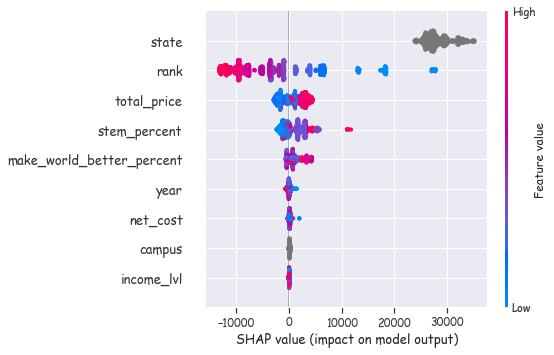

In [328]:
shap.summary_plot(shap_values[uni,:], X_noname.loc[uni,:], title='SHAP Feature importance (California)', show=False)
plt.savefig('FI_CA')

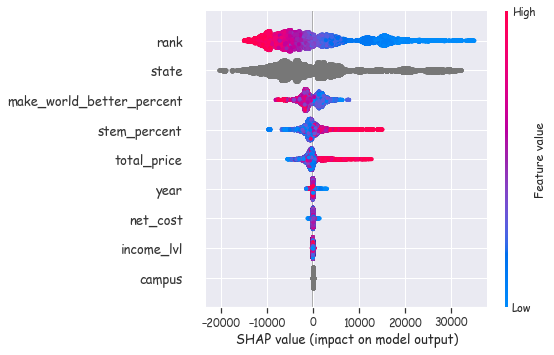

In [309]:
# все фичи

shap.summary_plot(shap_values, X_noname, title='Feature importance (all universities)', show=False)
plt.savefig('shap_FI.png')

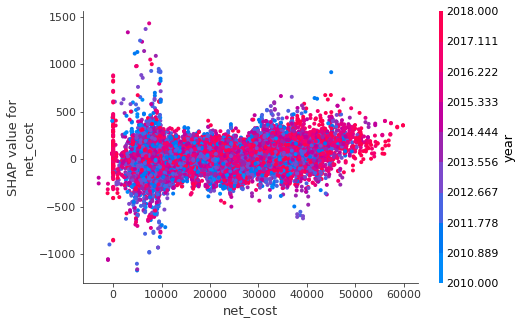

In [242]:
# Отдельная фича

shap.dependence_plot("net_cost", shap_values, X_noname, interaction_index='year')

# Diversity and future pay

In [166]:
div_pivot = div_sch.pivot_table(index='name', columns='category', values='enrollment')
div_pivot = div_pivot.div(div_pivot.sum(axis=1), axis=0)

In [349]:
div_pay = pay_prosp.merge(div_pivot, left_on='name', right_on='name', how='inner')
div_pay.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,...,Asian,Black,Hispanic,Native Hawaiian / Pacific Islander,Non-Resident Foreign,Total Minority,Two Or More Races,Unknown,White,Women
0,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,...,0.014317,0.044927,0.014269,0.0,0.033993,0.077872,0.0,0.0086,0.496796,0.304867
1,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,...,0.014317,0.044927,0.014269,0.0,0.033993,0.077872,0.0,0.0086,0.496796,0.304867
2,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,...,0.014317,0.044927,0.014269,0.0,0.033993,0.077872,0.0,0.0086,0.496796,0.304867
3,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,...,0.014317,0.044927,0.014269,0.0,0.033993,0.077872,0.0,0.0086,0.496796,0.304867
4,1,Auburn University,Alabama,54400,104500,51.0,31,AL,23788,2012,...,0.014317,0.044927,0.014269,0.0,0.033993,0.077872,0.0,0.0086,0.496796,0.304867


In [350]:
target = div_pay['mid_career_pay']

features = div_pay[['White', 'Asian', 'American Indian / Alaska Native', 
                    'Native Hawaiian / Pacific Islander', 'Two Or More Races',
                    'Hispanic', 'Black', 'Non-Resident Foreign',
       'Total Minority', 'Women']]

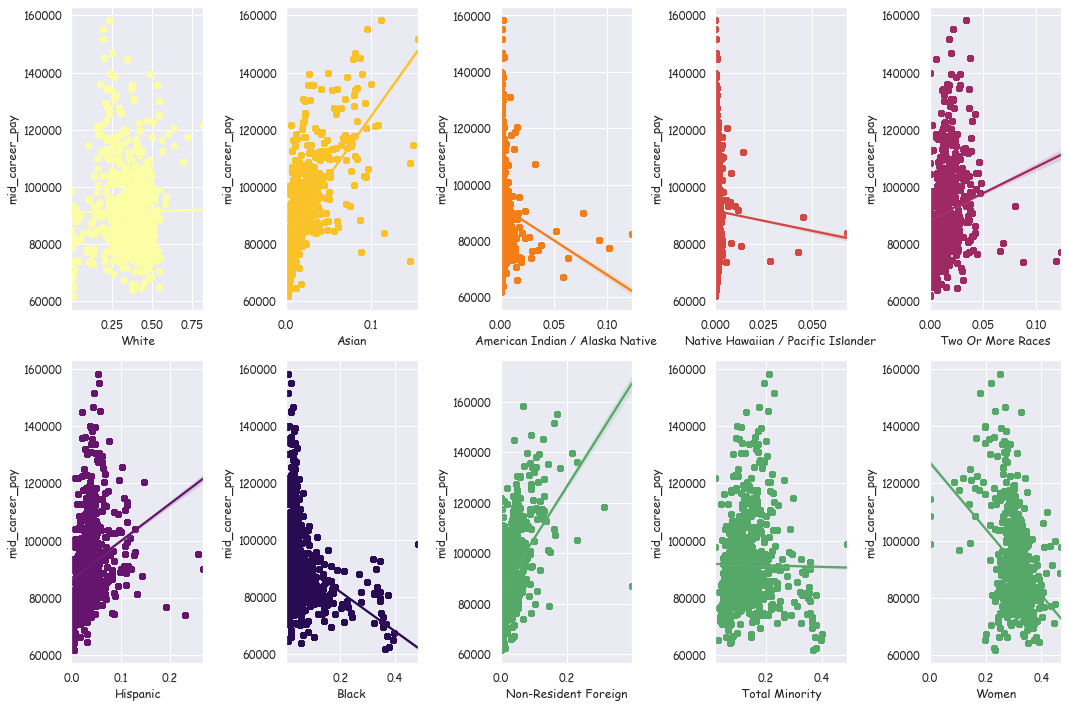

In [300]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
n_categories = 7
c = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)] + ['g'] * 3

for idx, feature in enumerate(features.columns):
    #div_pay.regplot(feature, "mid_career_pay", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])
    sns.regplot(x=feature, y="mid_career_pay", data=div_pay, ax=axes[idx // 5, idx % 5], color=c[idx])
    
plt.tight_layout()

plt.savefig('div_regplots.png')

Index(['name', 'urb', 'city', 'state', 'state_code', 'type', 'degree_length',
       'room_and_board', 'in_state_tuition', 'in_state_total',
       'out_of_state_tuition', 'out_of_state_total'],
      dtype='object')


<Figure size 1440x1440 with 0 Axes>

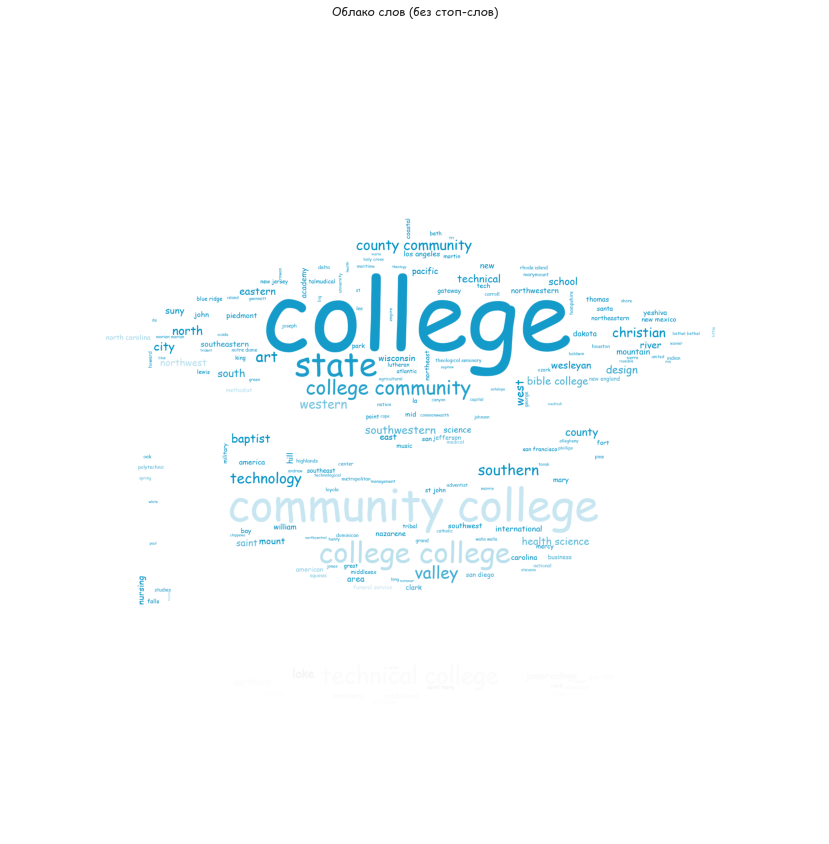

In [340]:
#! pip install wordcloud

all_sch = all_sch.rename(columns={'Institution Name':'name', 'Degree of urbanization (Urban-centric locale) (HD2017)':'urb', 'City location of institution (HD2017)':'city'}) 
d = all_sch[['name', 'urb', 'city']] 
# dff это tuition cost 
d = d.merge(tui_cost, on='name')
print(d.columns)

text = ' '.join([str(ele) for ele in d['name']]) 
states = set(d['state']).union(set(d['city'])) 
n_t='' 
for w in text.split(): 
    if w not in states: 
        n_t+=w + ' '
n_t = n_t.lower()
         
import sys 
import numpy as np 
from PIL import Image 
from wordcloud import WordCloud, ImageColorGenerator 
 
clr = np.array(Image.open('conf (2).png'))  # маска, чтобы взять контур картинки 
image_colors = ImageColorGenerator(clr)  # чтобы красить график в цвета картинки 
plt.figure(figsize=(20, 20))
 
wordcloud = WordCloud(font_path='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf',
    background_color='white',
    color_func=image_colors, 
    mask=clr, 
    width = 2000, 
    height = 2000, 
    max_font_size=500, 
    random_state=42, 
).generate(n_t)

plt.tight_layout()
plt.figure(figsize=(15, 15), facecolor=None)  
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title('Облако слов (без стоп-слов)') 
plt.savefig('wordcloud.png')